Grover's Search Circuit (Target: |11>):


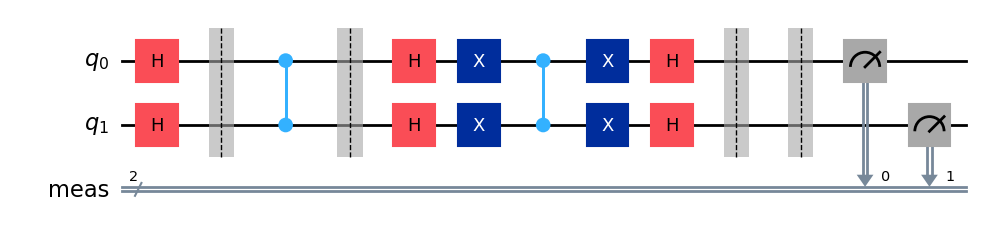


Search Results (Should be 100% '11'):
{'11': 1000}


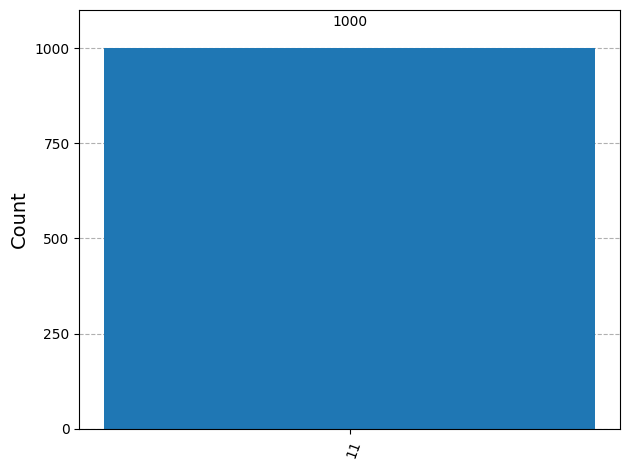

In [1]:
# --- Day 15: Grover's Algorithm (2 Qubits) ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Initialization
# Start in uniform superposition (Equal chance for 00, 01, 10, 11)
qc = QuantumCircuit(2)
qc.h([0, 1])

qc.barrier()

# 2. The Oracle (Mark the Winner)
# We want to find |11>.
# A Controlled-Z gate (CZ) flips the phase ONLY for state |11>.
# |11> -> -|11>
qc.cz(0, 1)

qc.barrier()

# 3. The Diffuser (The Amplifier)
# This generic block performs "Inversion about the Mean".
# Formula: H -> X -> CZ -> X -> H
qc.h([0, 1])
qc.x([0, 1])

qc.cz(0, 1) # This acts as the "reflection" mechanism

qc.x([0, 1])
qc.h([0, 1])

qc.barrier()

# 4. Measure
qc.measure_all()

# 5. Draw
print("Grover's Search Circuit (Target: |11>):")
display(qc.draw(output='mpl'))

# 6. Simulate
sim = AerSimulator()
qc_t = transpile(qc, sim)
result = sim.run(qc_t, shots=1000).result()
counts = result.get_counts()

# 7. Analyze
print("\nSearch Results (Should be 100% '11'):")
print(counts)
display(plot_histogram(counts))